In [35]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from plotnine import *
import seaborn as sns
sns.set(style='darkgrid')


from scipy import stats
import math
os.chdir('C:\\Users\\user\\Documents\\2020년 2학기\\Raw')

In [2]:
os.chdir('C:\\Users\\user\\Documents\\2020년 2학기\\Raw')
set_code = 'S71'
set_name = 'Galaxy'

Base_data = pd.read_csv('Phone_data.csv')
Base_data = Base_data[Base_data['브랜드']==set_name]
Base_data = Base_data[Base_data['피험자']!='P03']
print(Base_data.columns)
Base_data.tail()

Index(['피험자', '성별', '나이', '핸드폰_선호', '핸드폰_사용', '감정통제력', '충동통제력', '공감능력',
       '갤럭시_평가', '아이폰_평가', '브랜드', '개성_흥미', '개성_유능함', '개성_강인함', '태도', '애착',
       '충성도', '신경증', '외향성', '개방성', '성실성', '친화성'],
      dtype='object')


,피험자,성별,나이,핸드폰_선호,핸드폰_사용,감정통제력,충동통제력,공감능력,갤럭시_평가,아이폰_평가,...,개성_유능함,개성_강인함,태도,애착,충성도,신경증,외향성,개방성,성실성,친화성
51,P26,F,25.0,LG,LG,3.333333,3.333333,3.000000,2.0,1.0,...,6.000000,5.50,2.666667,1.50,1.0,3.000000,3.333333,2.000000,3.000000,2.000000
53,P27,M,23.0,iphone,iphone,4.000000,4.000000,4.333333,7.0,5.0,...,5.666667,4.00,2.333333,1.50,1.0,3.666667,4.000000,1.666667,3.000000,3.666667
55,P28,M,24.0,iphone,iphone,2.666667,4.000000,3.333333,6.0,5.0,...,6.000000,6.50,4.333333,3.00,3.0,3.666667,4.000000,2.333333,3.333333,4.000000
57,P29,F,20.0,Galaxy,Galaxy,2.666667,3.666667,3.666667,1.0,1.0,...,4.666667,4.50,4.000000,4.25,4.0,2.666667,2.666667,3.666667,3.333333,3.333333
59,P30,M,25.0,iphone,iphone,3.666667,3.333333,4.666667,6.0,5.0,...,6.000000,4.25,3.333333,3.25,2.8,3.333333,3.666667,3.333333,3.333333,4.000000


In [3]:
os.chdir('.\\2s Export\\log_data')
d_list = os.listdir()

In [4]:
data_set_list = []
data_p_list = []
for d in d_list:
    if d.split('_')[0] == set_code:
        data_set_list.append(d)
        data_p_list.append('P'+ str(d.split('_')[1].split('.')[0][2:]) )

print('데이터 개수 :',len(data_set_list))
print('피험자 수 :',len(data_p_list))
print(data_set_list)
print(data_p_list)

데이터 개수 : 29
피험자 수 : 29
['S71_0001.csv', 'S71_0002.csv', 'S71_0004.csv', 'S71_0005.csv', 'S71_0006.csv', 'S71_0007.csv', 'S71_0008.csv', 'S71_0009.csv', 'S71_0010.csv', 'S71_0011.csv', 'S71_0012.csv', 'S71_0013.csv', 'S71_0014.csv', 'S71_0015.csv', 'S71_0016.csv', 'S71_0017.csv', 'S71_0018.csv', 'S71_0019.csv', 'S71_0020.csv', 'S71_0021.csv', 'S71_0022.csv', 'S71_0023.csv', 'S71_0024.csv', 'S71_0025.csv', 'S71_0026.csv', 'S71_0027.csv', 'S71_0028.csv', 'S71_0029.csv', 'S71_0030.csv']
['P01', 'P02', 'P04', 'P05', 'P06', 'P07', 'P08', 'P09', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30']


In [5]:
df1 = pd.DataFrame()
for i in range(len(data_set_list)):
    raw = data_set_list[i]
    df = pd.read_csv(raw)
    col_nm = df.columns
    
    if i == 0:
        df1['time'] = df['time']
    
    df1[data_p_list[i]] = df['F4/F3']

col = df1.columns.to_list()
col.sort()
print(col)

['P01', 'P02', 'P04', 'P05', 'P06', 'P07', 'P08', 'P09', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30', 'time']


In [6]:
df = pd.DataFrame()
for i in range(len(data_set_list)):
    raw = data_set_list[i]
    P = data_p_list[i]
    raw_df = pd.read_csv(raw)
    raw_df = raw_df[['time','F4/F3']]
    raw_df['P'] = P
    
    df = pd.concat([df, raw_df])

df.rename(columns={'F4/F3':'FAA'}, inplace=True)
df

,time,FAA,P
0,-12,-0.073439,P01
1,-10,0.100864,P01
2,-8,0.421352,P01
3,-6,0.203973,P01
4,-4,-0.114497,P01
...,...,...,...
17,22,-0.205561,P30
18,24,-0.264717,P30
19,26,-0.017279,P30
20,28,-0.536570,P30


## 그래프 그리는 함수 정의

In [97]:
# 그래프 그리기 위한 함수

# 두 그룹 직접 비교용 선 그래프
def draw_line(data, label, valid_time, ylim=0.55, ad_sec=30, title=None):
    sns.set(rc={'figure.figsize':(8,6)})
    ax = sns.lineplot(data=data, x='time', y='FAA', 
                      hue=label, style=label, linewidth=3, ci=None)
    plt.ylabel('FAA')
    plt.xlabel('time(s)')
    plt.ylim(-ylim, ylim)
    plt.xlim(-5, ad_sec)
    
    if title:
        plt.title(title,fontsize=15)
    
    
    # valid 구간 강조
    for time in valid_time:
        plt.axvspan(time-2, time, facecolor='r', alpha=0.2)
    
    plt.show()

# 가독성 저하로 인해 상하분리한 리본 그래프
def draw_ribbon(data, label, group_list, valid_time, ylim=0.55, ad_sec=30, title=None):
    sns.set(rc={'figure.figsize':(8,8)})
    fig, (ax0,ax1) = plt.subplots(nrows=2)
    
    data_0 = data[data[label]==group_list[0]]
    data_1 = data[data[label]==group_list[1]]
    
    sns.lineplot(data=data_0, x='time', y='FAA', ax=ax0, linewidth=3) 
    sns.lineplot(data=data_1, x='time', y='FAA', ax=ax1, linewidth=3)
    
    if title:
        ax0.set_title(title,fontsize=15)
    
     # valid 구간 강조
    for time in valid_time:
        ax0.axvspan(time-2, time, facecolor='r', alpha=0.2)
        ax1.axvspan(time-2, time, facecolor='r', alpha=0.2) 
    
    ax0.set(ylabel='FAA', xlabel='', ylim=(-ylim,ylim), xlim=(-5,ad_sec))
    ax1.set(ylabel='FAA', xlabel='times(s)', ylim=(-ylim,ylim), xlim=(-5,ad_sec))
    

## 사용 핸드폰 그룹 T-test

In [8]:
variable = '핸드폰_사용'
group_list = Base_data[variable].drop_duplicates().to_list()
print(group_list)

for i in range(len(group_list)):
    globals()['p_list{}'.format(i)] = Base_data[Base_data[variable]==group_list[i]]['피험자'].drop_duplicates().to_list()
    print('p_list{}'.format(i), globals()['p_list{}'.format(i)] )

['Galaxy', 'iphone', 'LG']
p_list0 ['P01', 'P02', 'P04', 'P05', 'P09', 'P11', 'P12', 'P15', 'P16', 'P17', 'P19', 'P21', 'P24', 'P25', 'P29']
p_list1 ['P06', 'P08', 'P10', 'P13', 'P14', 'P18', 'P22', 'P23', 'P27', 'P28', 'P30']
p_list2 ['P07', 'P20', 'P26']


In [9]:
# 그룹 최종 결정
label = "Users"
group_list = ['Galaxy', 'iPhone']
p_list0 = p_list0
p_list1 = p_list1

In [10]:
# label 칼럼 생성
T_df = df.copy()
T_df[label]= None
print(len(T_df))
T_df.head()

638


,time,FAA,P,Users
0,-12,-0.073439,P01,None
1,-10,0.100864,P01,None
2,-8,0.421352,P01,None
3,-6,0.203973,P01,None
4,-4,-0.114497,P01,None


In [11]:
# label 칼럼에 알맞은 그룹 라벨링
T_df[label] = T_df['P'].apply(lambda x : group_list[0] if x in p_list0 else (group_list[1] if x in p_list1 else 0))
T_df = T_df[T_df[label] != 0]
print(len(T_df))
T_df.head()

572


,time,FAA,P,Users
0,-12,-0.073439,P01,Galaxy
1,-10,0.100864,P01,Galaxy
2,-8,0.421352,P01,Galaxy
3,-6,0.203973,P01,Galaxy
4,-4,-0.114497,P01,Galaxy


In [29]:
#구간 별 t-test 결과
print(f'{group_list[0]}(N={len(p_list0)}) vs {group_list[1]}(N={len(p_list1)})','\n')

valid = []

for i in range(len(df1)):
    tTestResult = stats.ttest_ind(df1[p_list0].iloc[i], df1[p_list1].iloc[i], equal_var=False)
    if tTestResult[1] < 0.05:
        print(math.ceil(df1['time'].iloc[i]),'\t',tTestResult, '\t', '*')
        valid.append(df1['time'].iloc[i])
    else:
        print(math.ceil(df1['time'].iloc[i]),'\t',tTestResult)
        
print('\n','valid timeline :', valid)

Galaxy(N=15) vs iPhone(N=11) 

-12 	 Ttest_indResult(statistic=-0.7413313034006662, pvalue=0.4679221140239117)
-10 	 Ttest_indResult(statistic=1.567557442107188, pvalue=0.1311882231418337)
-8 	 Ttest_indResult(statistic=1.0558997779524792, pvalue=0.3059095092023648)
-6 	 Ttest_indResult(statistic=0.06734368395531497, pvalue=0.9469668723688001)
-4 	 Ttest_indResult(statistic=-1.5235312177307776, pvalue=0.14960305144940625)
-2 	 Ttest_indResult(statistic=-0.47409356200918323, pvalue=0.6414186915560258)
0 	 Ttest_indResult(statistic=0.031161950663505956, pvalue=0.975490497300808)
2 	 Ttest_indResult(statistic=0.5917943425646652, pvalue=0.5604006541792756)
4 	 Ttest_indResult(statistic=0.29831257893914226, pvalue=0.7680670033413726)
6 	 Ttest_indResult(statistic=0.9747721717402769, pvalue=0.3403421162863285)
8 	 Ttest_indResult(statistic=0.06909787176628306, pvalue=0.9457314581596912)
10 	 Ttest_indResult(statistic=1.6475371529290874, pvalue=0.12196561406050856)
12 	 Ttest_indResult(statis

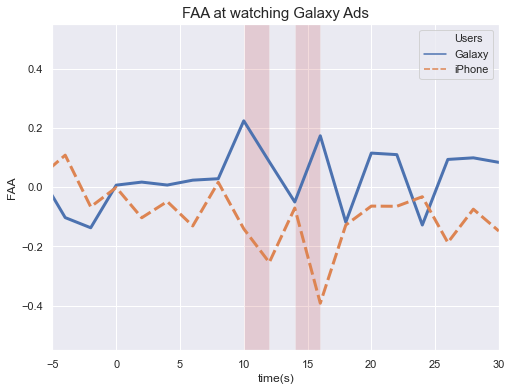

In [98]:
draw_line(T_df, label, valid_time=valid, title='FAA at watching Galaxy Ads')

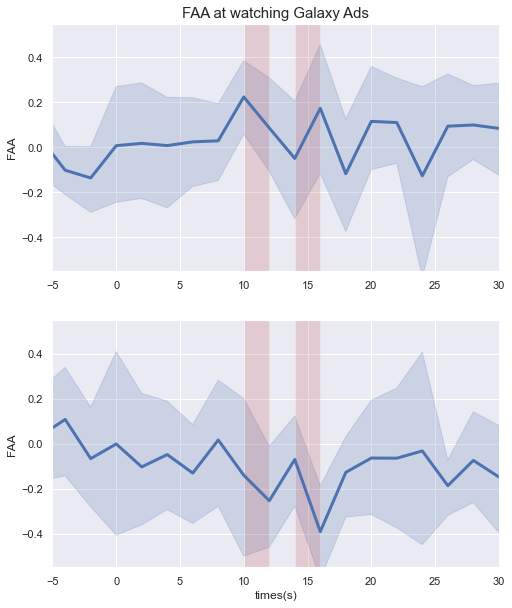

In [99]:
draw_ribbon(T_df, label, group_list, valid_time = valid, title='FAA at watching Galaxy Ads')

## 충성도 상위 25%

In [71]:
set_name

'Galaxy'

In [115]:
variable = '충성도'

up_part = Base_data.sort_values(by=[variable], ascending=False).iloc[:int(len(Base_data)*0.34)]
up_part = up_part[up_part['핸드폰_사용'] == set_name]

down_part = Base_data.sort_values(by=[variable], ascending=False).iloc[-int(len(Base_data)*0.30):]
down_part = down_part[down_part['핸드폰_사용'] != set_name]

print(up_part['피험자'].to_list())
print(down_part['피험자'].to_list())

['P09', 'P11', 'P24', 'P16', 'P21', 'P05', 'P15']
['P28', 'P13', 'P30', 'P18', 'P08', 'P26', 'P27']


In [116]:
group_list = ['high','low']
p_list0 = up_part['피험자'].to_list()
p_list1 = down_part['피험자'].to_list()

In [117]:
merge_df = pd.DataFrame()
for i in range(len(group_list)):
    globals()['p_list{}_df'.format(i)] = col_mean_ci(df1, globals()['p_list{}'.format(i)])
    globals()['p_list{}_df'.format(i)]['id'] = group_list[i]

    merge_df = merge_df.append(globals()['p_list{}_df'.format(i)])

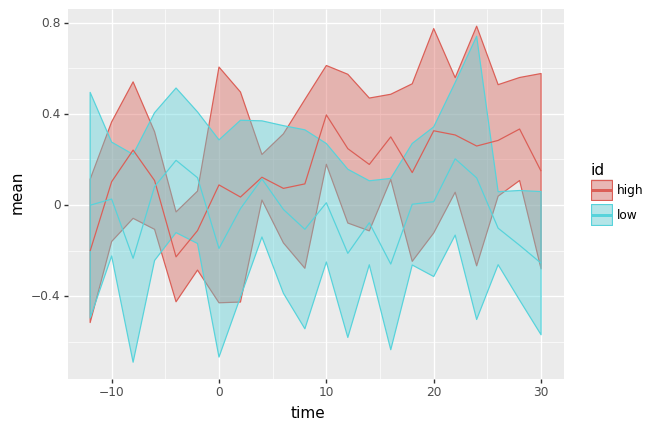

<ggplot: (142496344317)>

In [118]:
fig = plt.Figure()

(
ggplot(merge_df, aes(x = 'time', y = 'mean', color = 'id', fill = 'id'))
+geom_ribbon(aes(ymin='ci95_lo',ymax='ci95_hi', color = 'id'), alpha=0.4)
+geom_line(aes(x='time',y='mean'))

)

In [119]:
#구간 별 t-test 결과
for i in range(len(df1)):
    tTestResult = stats.ttest_ind(df1[p_list0].iloc[i], df1[p_list1].iloc[i], equal_var=False)
    if tTestResult[1] < 0.05:
        print(math.ceil(df1['time'].iloc[i]),'\t',tTestResult, '\t', '*')
    else:
        print(math.ceil(df1['time'].iloc[i]),'\t',tTestResult)

-12 	 Ttest_indResult(statistic=-0.724158189408497, pvalue=0.4853010140026377)
-10 	 Ttest_indResult(statistic=0.4443211665893364, pvalue=0.6647361603416234)
-8 	 Ttest_indResult(statistic=1.842496708355112, pvalue=0.09416548671558556)
-6 	 Ttest_indResult(statistic=0.14489456092471073, pvalue=0.8875645278069026)
-4 	 Ttest_indResult(statistic=-2.4010860725786816, pvalue=0.037171215869722704) 	 *
-2 	 Ttest_indResult(statistic=-1.4592764560132931, pvalue=0.17570307917070702)
0 	 Ttest_indResult(statistic=0.8395792251646569, pvalue=0.4176651780030095)
2 	 Ttest_indResult(statistic=0.1786450469683145, pvalue=0.8612831209780754)
4 	 Ttest_indResult(statistic=0.056672429109437504, pvalue=0.9562306851747813)
6 	 Ttest_indResult(statistic=0.4462844445639754, pvalue=0.6646209035923738)
8 	 Ttest_indResult(statistic=0.7370201017303706, pvalue=0.47564316351472724)
10 	 Ttest_indResult(statistic=2.412119910739829, pvalue=0.03338783009881917) 	 *
12 	 Ttest_indResult(statistic=1.9743032042238713,

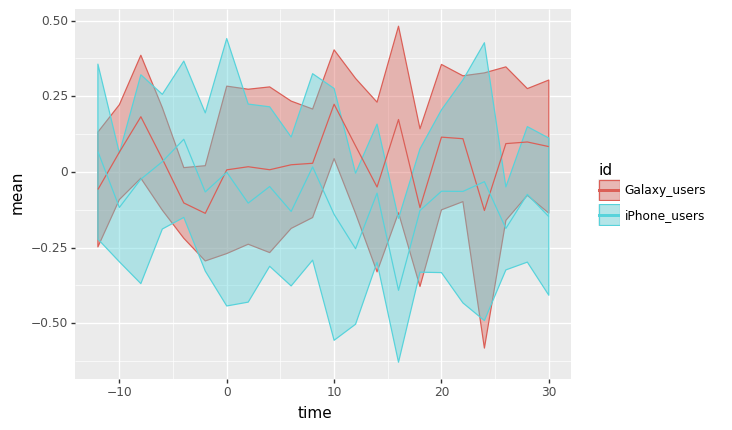

<ggplot: (142493286958)>

In [27]:
# ci 계산 함수 (ggplot으로 그릴 때 사용)
# def col_mean_ci(dataframe, p_col):
#     df = pd.DataFrame()
#     df['time'] = dataframe['time']
#     df['mean'] = dataframe[p_col].mean(axis=1)
#     df['std'] = dataframe[p_col].std(axis=1)
#     n = len(p_col)
#     df['ci95_hi'] = df['mean'] + 1.96*df['std']/math.sqrt(n-1)
#     df['ci95_lo'] = df['mean'] - 1.96*df['std']/math.sqrt(n-1)
#     return df


# ggplot으로 그릴 때 사용
# merge_df = pd.DataFrame()
# for i in range(len(group_list)):
#     globals()['p_list{}_df'.format(i)] = col_mean_ci(df1, globals()['p_list{}'.format(i)])
#     globals()['p_list{}_df'.format(i)][label] = group_list[i]
#     merge_df = merge_df.append(globals()['p_list{}_df'.format(i)])


# fig = plt.Figure()
# (
# ggplot(merge_df, aes(x = 'time', y = 'mean', color = 'id', fill = 'id'))
# +geom_ribbon(aes(ymin='ci95_lo',ymax='ci95_hi', color = 'id'), alpha=0.4)
# +geom_line(aes(x='time',y='mean'))
# )